**Note:** In this example there is a lot of code. You are not expected to know how to read any of this yet. This is just a preview of the things you will see in the next few weeks. 


## This is a Jupyter Notebook

A Jupyter Notebook is a document that combines:

1. **Narrative:** The text describing your analysis
2. **Code:** The program that does the analysis
3. **Results:** The output of the program

The Jupyter environment was created by faculty here at Berkeley (Fernando Perez). These ideas are now in a lot of different technologies (e.g., Google Colab). 

## Our first example: analyzing the text of Little Women

*["Little Women"](https://en.wikipedia.org/wiki/Little_Women)* by Louisa May Alcott is the story of four sisters and their neighbor Laurie (Theodore Laurence).

To analyze it, we define a **function** that reads data from the Internet.

In [1]:
# A tiny program to download text from the web.
def read_url(url): 
    from urllib.request import urlopen 
    import re
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

Here we download the book, which is hosted on the Data 8 textbook website.

In [2]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

## Tables

- A lot of data science is about transforming data. This is often in service of producing **tables**, a widely used data structure that we can more easily analyze our data with. 
- In this class you will use the `datascience` library (specifically created for this course) to manipulate and data.

In [3]:
from datascience import *

In [4]:
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


## We will learn to visualize data

Most notebooks contain some setup for data manipulation and visualization. The details aren't important, but an LM can tell you about them.

In [6]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

We can calculate the number of times Jo was mentioned in each chapter.

In [7]:
np.char.count(little_women_chapters, 'Jo')

array([44, 21, 62, 34, 55, 13,  9, 71, 21, 12, 42, 60, 24, 48, 26, 13, 29,
       35,  5, 29, 67, 17, 51, 36, 12, 17, 28, 69, 49, 39,  7, 60,  2, 55,
       42, 35,  5, 47, 15, 15, 17, 36, 61,  9,  6, 56, 37])

How about the other characters? We could build a table.

In [8]:
# Counts of names in the chapters of Little Women

names = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
mentions = {name: np.char.count(little_women_chapters, name) for name in names}

counts = Table().with_columns([
        'Amy',    mentions['Amy'],
        'Beth',   mentions['Beth'],
        'Jo',     mentions['Jo'],
        'Laurie', mentions['Laurie'],
        'Meg',    mentions['Meg']
    ])
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


We can accumulate the counts for each character to show the total in the book so far.

In [9]:
cumulative_counts = Table()
for label in counts.labels:
    cumulative_counts = cumulative_counts.with_column(label, np.cumsum(counts.column(label)))
cumulative_counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
36,38,65,0,46
38,40,127,16,82
52,58,161,16,99
58,72,216,51,112
64,100,229,60,117
91,105,238,67,122
139,114,309,84,138
142,119,330,108,209
147,124,342,112,213


And then to study these numbers we can create a line chart of cumulative counts.

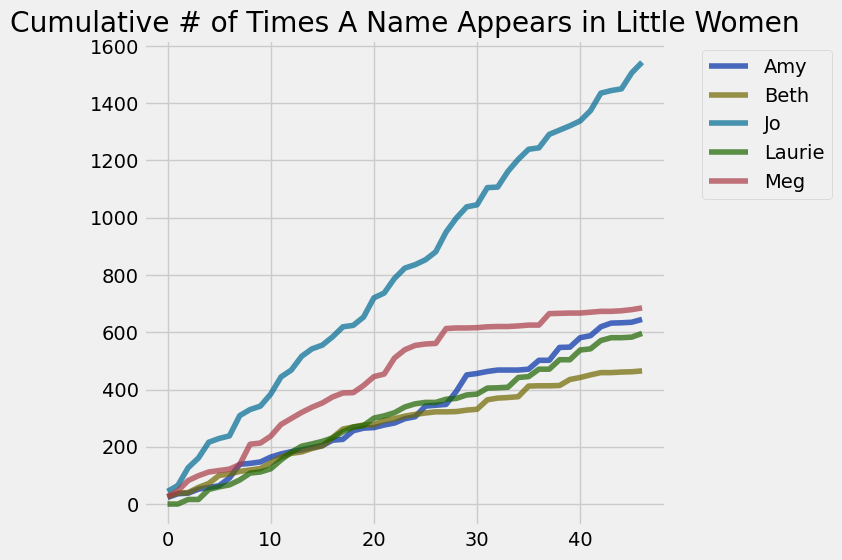

In [10]:
cumulative_counts.plot()
plt.title('Cumulative # of Times A Name Appears in Little Women')
plt.show()